The `Path` class is imported from the `pathlib` module in order to deal with file paths across all operating systems without complexity.

In [1]:
import pandas as pd
from pathlib import Path

## Reading CSVs

The `read_csv` function allows users to read a CSV file into a DataFrame. Use a `Path` object to spcifiy the location of the file.

Parameters of `read_csv` function:
* The `header=None` parameter tells Pandas not to use the first row as the header. Because no header is specified, the column index numbers are used instead.
* New headers can be supplied by assigning a new list of column names to the `columns` attribute. <font color='red'>(注意：`columns` 是一个attribute，不是parameter)</font>
    * The `header=None` parameter can be specified to prevent the first row of data from being used as column names when there is no header provided.
    * Once the `header` is set to None, the `df.columns` function can be used to assign column names.

<font color='red'>**自己加：**</font>如果只想读进来file中的specific columns而不是全部 columns，需要用 `usecols` parameter.

<font color='red'>**自己加：**</font>另外一个`read_csv`函数跟index 有关的parameter，`index_col`.

In [2]:
csvpath = Path("../data/AAPL.csv")
aapl_df = pd.read_csv(csvpath)
iris_df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
customers_df = pd.read_csv('../data/Customers.csv')

In [3]:
aapl_df_nocols = pd.read_csv(csvpath, header=None)
aapl_df_nocols

,0,1,2,3,4,5,6
0,Date,Open,High,Low,Close,Adj Close,Volume
1,2018-03-01,44.634998,44.945000,43.165001,43.750000,41.707802,195208000
2,2018-03-02,43.200001,44.075001,43.112499,44.052502,41.996174,153816000
3,2018-03-05,43.802502,44.435001,43.630001,44.205002,42.141563,113605600
4,2018-03-06,44.477501,44.562500,44.032501,44.167500,42.105808,95154000
...,...,...,...,...,...,...,...
1254,2023-02-22,148.869995,149.949997,147.160004,148.910004,148.910004,51011300
1255,2023-02-23,150.089996,150.339996,147.240005,149.399994,149.399994,48394200
1256,2023-02-24,147.110001,147.190002,145.720001,146.710007,146.710007,55469600
1257,2023-02-27,147.710007,149.169998,147.449997,147.919998,147.919998,44998500


In [4]:
columns = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
aapl_df_nocols.columns = columns
aapl_df_nocols

,a,b,c,d,e,f,g
0,Date,Open,High,Low,Close,Adj Close,Volume
1,2018-03-01,44.634998,44.945000,43.165001,43.750000,41.707802,195208000
2,2018-03-02,43.200001,44.075001,43.112499,44.052502,41.996174,153816000
3,2018-03-05,43.802502,44.435001,43.630001,44.205002,42.141563,113605600
4,2018-03-06,44.477501,44.562500,44.032501,44.167500,42.105808,95154000
...,...,...,...,...,...,...,...
1254,2023-02-22,148.869995,149.949997,147.160004,148.910004,148.910004,51011300
1255,2023-02-23,150.089996,150.339996,147.240005,149.399994,149.399994,48394200
1256,2023-02-24,147.110001,147.190002,145.720001,146.710007,146.710007,55469600
1257,2023-02-27,147.710007,149.169998,147.449997,147.919998,147.919998,44998500


The `head` function returns the first 5 rows

The `tail` function return the last 5 rows

In [5]:
display( aapl_df.head() )
display( aapl_df.tail() )

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-03-01,44.634998,44.945000,43.165001,43.750000,41.707802,195208000
1,2018-03-02,43.200001,44.075001,43.112499,44.052502,41.996174,153816000
2,2018-03-05,43.802502,44.435001,43.630001,44.205002,42.141563,113605600
3,2018-03-06,44.477501,44.562500,44.032501,44.167500,42.105808,95154000
4,2018-03-07,43.735001,43.962502,43.567501,43.757500,41.714939,126814000


,Date,Open,High,Low,Close,Adj Close,Volume
1253,2023-02-22,148.869995,149.949997,147.160004,148.910004,148.910004,51011300
1254,2023-02-23,150.089996,150.339996,147.240005,149.399994,149.399994,48394200
1255,2023-02-24,147.110001,147.190002,145.720001,146.710007,146.710007,55469600
1256,2023-02-27,147.710007,149.169998,147.449997,147.919998,147.919998,44998500
1257,2023-02-28,147.050003,149.080002,146.830002,147.410004,147.410004,50547000


In [6]:
# Get the bottom 10 rows of the DataFrame.
aapl_df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
1248,2023-02-14,152.119995,153.770004,150.860001,153.199997,153.199997,61707600
1249,2023-02-15,153.110001,155.500000,152.880005,155.330002,155.330002,65669300
1250,2023-02-16,153.509995,156.330002,153.350006,153.710007,153.710007,68167900
1251,2023-02-17,152.350006,153.000000,150.850006,152.550003,152.550003,59095900
1252,2023-02-21,150.199997,151.300003,148.410004,148.479996,148.479996,58867200
1253,2023-02-22,148.869995,149.949997,147.160004,148.910004,148.910004,51011300
1254,2023-02-23,150.089996,150.339996,147.240005,149.399994,149.399994,48394200
1255,2023-02-24,147.110001,147.190002,145.720001,146.710007,146.710007,55469600
1256,2023-02-27,147.710007,149.169998,147.449997,147.919998,147.919998,44998500
1257,2023-02-28,147.050003,149.080002,146.830002,147.410004,147.410004,50547000


It is common to generate high-level statistics when creating a DataFrame. In this case the Pandas `describe` function can be used.
* The output of the function is summary statistics for numberic fields, including series counts, averages, minimum value, maximum value, and so on.
* A limitation of the `describe` function is that it only calculates summary statistics for numeric value columns.

In [7]:
aapl_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,101.165763,102.406598,99.989223,101.250497,99.886915,1.141118e+08
std,45.847628,46.443235,45.255260,45.873843,46.180612,5.410241e+07
min,35.994999,36.430000,35.500000,35.547501,34.257282,3.519590e+07
25%,52.462500,52.973125,51.853751,52.328125,50.902652,7.786562e+07
50%,113.047500,115.115002,110.593750,112.773751,111.074520,9.912660e+07
75%,144.014999,146.404995,142.649994,144.552505,143.712307,1.336701e+08
max,182.630005,182.940002,179.119995,182.009995,180.683868,4.265100e+08


In [8]:
aapl_df.describe()['Open']

count    1258.000000
mean      101.165763
std        45.847628
min        35.994999
25%        52.462500
50%       113.047500
75%       144.014999
max       182.630005
Name: Open, dtype: float64

In [9]:
aapl_df['Open'].describe()         # This is a pandas.core.series.Series

count    1258.000000
mean      101.165763
std        45.847628
min        35.994999
25%        52.462500
50%       113.047500
75%       144.014999
max       182.630005
Name: Open, dtype: float64

In [10]:
aapl_df['Open'].describe()['std']

45.847628245110826

In [11]:
iris_df['species'].describe()       # 'species' is a categorical column, not numerical

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

In [12]:
iris_df.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


## Column Manipulation

* "columns" attribute of DataFrame
* rename columns
* reorder columns
* create columns
* split columns
* drop columns

Pandas DataFrames have a `columns` attribute that shows the current column names.

The `columns` attribute can be assigned a new list of column values. This has certain restrictions, such as that 
the list of column names must match the number of columns in the DataFrame (no partial lists). This is valuable 
whenever column names need to be changed.

In [13]:
aapl_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [14]:
aapl_df.columns = ['Date', 'Open', 'High_Price', 'Low', 'Close', 'Adj Close', 'Volume']
aapl_df.head()

,Date,Open,High_Price,Low,Close,Adj Close,Volume
0,2018-03-01,44.634998,44.945000,43.165001,43.750000,41.707802,195208000
1,2018-03-02,43.200001,44.075001,43.112499,44.052502,41.996174,153816000
2,2018-03-05,43.802502,44.435001,43.630001,44.205002,42.141563,113605600
3,2018-03-06,44.477501,44.562500,44.032501,44.167500,42.105808,95154000
4,2018-03-07,43.735001,43.962502,43.567501,43.757500,41.714939,126814000


The `rename` function can be used to replace or update selective column names. Simply provide a dictionary to the 
column's parameter that has the following format:

```python
    {
      "Old Column Name": "New Column Name"
    }
```

In [15]:
aapl_df = aapl_df.rename(columns={
    "Open":"Open Price"
})
# 这里需要 reassign，否则 aapl_df 的 column name 不会变
# 这里必须要specify columns parameter 去点明是想要 rename columns  # rename 也能 rename row 的 index，用的 parameter是 index
# rename 一个不存在的 column，不会出现 error
aapl_df

,Date,Open Price,High_Price,Low,Close,Adj Close,Volume
0,2018-03-01,44.634998,44.945000,43.165001,43.750000,41.707802,195208000
1,2018-03-02,43.200001,44.075001,43.112499,44.052502,41.996174,153816000
2,2018-03-05,43.802502,44.435001,43.630001,44.205002,42.141563,113605600
3,2018-03-06,44.477501,44.562500,44.032501,44.167500,42.105808,95154000
4,2018-03-07,43.735001,43.962502,43.567501,43.757500,41.714939,126814000
...,...,...,...,...,...,...,...
1253,2023-02-22,148.869995,149.949997,147.160004,148.910004,148.910004,51011300
1254,2023-02-23,150.089996,150.339996,147.240005,149.399994,149.399994,48394200
1255,2023-02-24,147.110001,147.190002,145.720001,146.710007,146.710007,55469600
1256,2023-02-27,147.710007,149.169998,147.449997,147.919998,147.919998,44998500


Columns can also be reordered by supplying a list of columns in the desired order.

In [16]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
iris_df = iris_df[['species', 'petal_length', 'petal_width', 'sepal_length', 'sepal_width']]
iris_df.head()

,species,petal_length,petal_width,sepal_length,sepal_width
0,setosa,1.4,0.2,5.1,3.5
1,setosa,1.4,0.2,4.9,3.0
2,setosa,1.3,0.2,4.7,3.2
3,setosa,1.5,0.2,4.6,3.1
4,setosa,1.4,0.2,5.0,3.6


New columns can be created by assigning a Pandas Series to a new column name. This is similar to how dictionaries
add values for new keys

In [18]:
aapl_df['Close_thousand'] = aapl_df['Close']/1000
aapl_df.head()

,Date,Open Price,High_Price,Low,Close,Adj Close,Volume,Close_thousand
0,2018-03-01,44.634998,44.945000,43.165001,43.750000,41.707802,195208000,0.043750
1,2018-03-02,43.200001,44.075001,43.112499,44.052502,41.996174,153816000,0.044053
2,2018-03-05,43.802502,44.435001,43.630001,44.205002,42.141563,113605600,0.044205
3,2018-03-06,44.477501,44.562500,44.032501,44.167500,42.105808,95154000,0.044167
4,2018-03-07,43.735001,43.962502,43.567501,43.757500,41.714939,126814000,0.043757


Sometimes, columns may need to be split into spearate values. Pandas allows you to split a column based on a 
delimiter. In this case, the values are split by the whitespaces between the names. The `expand=True` flag tells
Pandas to create two new columns from the split. These columns can be assigned to new column names in the DataFrame.

In [19]:
customers_df['contactName'].split(" ")

AttributeError: 'Series' object has no attribute 'split'

In [20]:
# There is multiple way to do it row by row. One is to use the "apply" method. I'm going to show you a different one
# for split.

names = customers_df['contactName'].str.split(" ", expand=True)
names

,0,1,2
0,Maria,Anders,None
1,Ana,Trujillo,None
2,Antonio,Moreno,None
3,Thomas,Hardy,None
4,Matti,Karttunen,None
...,...,...,...
87,Pirkko,Koskitalo,None
88,Paula,Parente,None
89,Zbyszek,Piestrzeniewicz,None
90,Matti,Karttunen,None


In [21]:
customers_df["first_name"] = names[0]
customers_df["last_name"] = names[1]
customers_df

,customerID,companyName,contactName,contactTitle,address,city,region,postalCode,country,phone,fax,salesAmount,dollarAmount,first_name,last_name
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,NaN,12209,Germany,030-0074321,030-0076545,100.73,$100.30,Maria,Anders
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,NaN,5021,Mexico,(5) 555-4729,(5) 555-3745,101.00,$101.70,Ana,Trujillo
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,NaN,5023,Mexico,(5) 555-3932,NaN,NaN,$103.10,Antonio,Moreno
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,NaN,WA1 1DP,UK,(171) 555-7788,(171) 555-6750,103.00,$104.50,Thomas,Hardy
4,WILMK,Wilman Kala,Matti Karttunen,Owner/Marketing Assistant,Keskuskatu 45,Helsinki,NaN,21240,Finland,90-224 8858,90-224 8858,189.90,$105.90,Matti,Karttunen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,WARTH,Wartian Herkku,Pirkko Koskitalo,Accounting Manager,Torikatu 38,Oulu,NaN,90110,Finland,981-443655,981-443655,186.00,$222.10,Pirkko,Koskitalo
88,WELLI,Wellington Importadora,Paula Parente,Sales Manager,Rua do Mercado,12,Resende,SP,08737-363,Brazil,(14) 555-8122,187.00,$223.50,Paula,Parente
89,WOLZA,Wolski Zajazd,Zbyszek Piestrzeniewicz,Owner,ul. Filtrowa 68,Warszawa,NaN,01-012,Poland,(26) 642-7012,(26) 642-7012,NaN,$227.70,Zbyszek,Piestrzeniewicz
90,WILMK,Wilman Kala,Matti Karttunen,Owner/Marketing Assistant,Keskuskatu 45,Helsinki,NaN,21240,Finland,90-224 8858,90-224 8858,189.90,$226.30,Matti,Karttunen


Finally, columns that are no longer needed can be dropped using the `drop` function. Simply spply a list of the
columns that should be dropped from the DataFrame.

In [22]:
customers_df = customers_df.drop(columns=["city"]) # 必须要 reassign the manipulation back to the original dataframe
# drop 的时候要 specify columns, 因为 drop function 也可以 drop rows（用的是 index parameter）(这一点和 rename function一样)
customers_df.head()

,customerID,companyName,contactName,contactTitle,address,region,postalCode,country,phone,fax,salesAmount,dollarAmount,first_name,last_name
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,NaN,12209,Germany,030-0074321,030-0076545,100.73,$100.30,Maria,Anders
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,NaN,5021,Mexico,(5) 555-4729,(5) 555-3745,101.00,$101.70,Ana,Trujillo
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,NaN,5023,Mexico,(5) 555-3932,NaN,NaN,$103.10,Antonio,Moreno
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,NaN,WA1 1DP,UK,(171) 555-7788,(171) 555-6750,103.00,$104.50,Thomas,Hardy
4,WILMK,Wilman Kala,Matti Karttunen,Owner/Marketing Assistant,Keskuskatu 45,NaN,21240,Finland,90-224 8858,90-224 8858,189.90,$105.90,Matti,Karttunen


## Data Cleaning (Perform data quality check)

<font color=blue>Being able to inspect numeric values and gauge the quality of numerical data is critical to seccess when analyzing and aggregating data.</font>

The first step in assessing data for quality issue is to visually evaluate a sample of the data. This allows 
programmers to identify obvious quality issues as well as any skewed rows (e.g., a customer address in a first name field).

A quick and easy way to confirm the quality of a numeric value is to sample the data and do a spot check.

In [23]:
# Take a random sample of your data set
customers_df.sample(5)

,customerID,companyName,contactName,contactTitle,address,region,postalCode,country,phone,fax,salesAmount,dollarAmount,first_name,last_name
23,FOLIG,Folies gourmandes,Martine Rancé,Assistant Sales Agent,184,Lille,NaN,59000,France,20.16.10.16,122.0,$132.50,Martine,Rancé
46,LILAS,LILA-Supermercado,Carlos González,Accounting Manager,Carrera 52 con Ave. Bolívar #65-98 Llano Largo,Lara,3508,Venezuela,(9) 331-6954,(9) 331-7256,125.0,$164.70,Carlos,González
17,DRACD,Drachenblut Delikatessen,Sven Ottlieb,Order Administrator,Walserweg 21,NaN,52066,Germany,0241-039123,0241-059428,116.0,$124.10,Sven,Ottlieb
71,SAVEA,Save-a-lot Markets,Jose Pavarotti,Sales Representative,187 Suffolk Ln.,ID,83720,USA,(208) 555-8097,NaN,170.0,$199.70,Jose,Pavarotti
50,MAISD,Maison Dewey,Catherine Dewey,Sales Agent,Rue Joseph-Bens 532,NaN,B-1180,Belgium,(02) 201 24 67,(02) 201 24 68,125.0,$170.30,Catherine,Dewey


The `dtypes` function can be used to return the data types of each Series/column.

In [24]:
# Retrieving DataFrame data types
customers_df.dtypes
aapl_df.dtypes

Date               object
Open Price        float64
High_Price        float64
Low               float64
Close             float64
Adj Close         float64
Volume              int64
Close_thousand    float64
dtype: object

The total number of records can be identified using the `count` function. The `count` function counts the number of <font color='red'>**non-null**</font> cells for each column or row in a Pandas DataFrame.

In [25]:
customers_df.count()        # The type of the output is pandas.core.series.Series

customerID      92
companyName     92
contactName     92
contactTitle    92
address         92
region          45
postalCode      76
country         92
phone           92
fax             77
salesAmount     81
dollarAmount    92
first_name      92
last_name       92
dtype: int64

<font color='red'>自己加：</font>想看看每个 column 有多少 non-null / null values，除了上面的 `count` 函数，`info` 函数也是很好的办法

In [26]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customerID    92 non-null     object 
 1   companyName   92 non-null     object 
 2   contactName   92 non-null     object 
 3   contactTitle  92 non-null     object 
 4   address       92 non-null     object 
 5   region        45 non-null     object 
 6   postalCode    76 non-null     object 
 7   country       92 non-null     object 
 8   phone         92 non-null     object 
 9   fax           77 non-null     object 
 10  salesAmount   81 non-null     float64
 11  dollarAmount  92 non-null     object 
 12  first_name    92 non-null     object 
 13  last_name     92 non-null     object 
dtypes: float64(1), object(13)
memory usage: 10.2+ KB


In [27]:
customers_df.isna().sum()

customerID       0
companyName      0
contactName      0
contactTitle     0
address          0
region          47
postalCode      16
country          0
phone            0
fax             15
salesAmount     11
dollarAmount     0
first_name       0
last_name        0
dtype: int64

Similarly, the quality of data can be assessed by using the `value_counts` function, which is a function that identifies the number of times a value occurs in a Series.

`value_counts` reveals how many times a value occurs in a Series, <font color='red'>**with the most occuring value first**</font>. (所以说`value_counts`的结果是 sorted 的)

The `value_counts()` function counts the frequency of unique values of a specific column or Series object.

<font color=red>Note: `value_counts` 只能作用在 Series 上，DataFrame 没有这个函数</font>

In [28]:
customers_df['contactTitle'].value_counts()

Sales Representative              17
Owner                             17
Marketing Manager                 12
Sales Manager                     11
Accounting Manager                10
Sales Associate                    7
Marketing Assistant                6
Sales Agent                        5
Owner/Marketing Assistant          2
Order Administrator                2
Assistant Sales Agent              2
Assistant Sales Representative     1
Name: contactTitle, dtype: int64

Identifying nulls is key in assessing data quality health.

* Pandas offes a native function, `isnull()`, that can be used to identify missing values in a field represented as Python `None` objects.
* The `isnull()` function identifies which column values are nulls and which ones are not.
* If a column value is null, `isnull` return `True`. If the value is not null, `isnull` return `False`

<font color=red>Note: `isnull` 既可作用在 DataFrame 上，又可以作用在 Series 上</font>

In [29]:
# Checking for null
customers_df.isnull()

,customerID,companyName,contactName,contactTitle,address,region,postalCode,country,phone,fax,salesAmount,dollarAmount,first_name,last_name
0,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,True,True,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,False,False,False,False,False,True,False,False,False,False,False,False,False,False
88,False,False,False,False,False,False,False,False,False,False,False,False,False,False
89,False,False,False,False,False,True,False,False,False,False,True,False,False,False
90,False,False,False,False,False,True,False,False,False,False,False,False,False,False


Accessing the percentage of nulls for the entire DataFrame is also valuable, especially when it comes to determining what should be done with the nulls in a DataFrame.

The precentage of nulls will influence the course of action for cleaning null, namely, dropping the nulls or leaving them alone.

In [30]:
# Checking the percentage of null
customers_df.isnull().mean() * 100

customerID       0.000000
companyName      0.000000
contactName      0.000000
contactTitle     0.000000
address          0.000000
region          51.086957
postalCode      17.391304
country          0.000000
phone            0.000000
fax             16.304348
salesAmount     11.956522
dollarAmount     0.000000
first_name       0.000000
last_name        0.000000
dtype: float64

Another method for determining how many nulls are in the DataFrame is to calculate the sum of all nulls.

In [31]:
# Checking for number of nulls
customers_df.isnull().sum()

customerID       0
companyName      0
contactName      0
contactTitle     0
address          0
region          47
postalCode      16
country          0
phone            0
fax             15
salesAmount     11
dollarAmount     0
first_name       0
last_name        0
dtype: int64

Nulls can be cleaned by replacing them with a defualt value: "Unknown", 0, or mean(). This is exactly what the Pandas `fillna` does!

`fillna` will replace every instance of `null` with the provided default value. <font color=red>For this reason, the function should be executed against a Series.</font>

<font color=green>但是自己试了一下，fillna function 也可以 apply 在 DataFrame 上</font>

但是 Usually `fillna` should have been applied against the specific Series that needed the nulls converted to 0/Unknown/...

In [32]:
customers_df['salesAmont']= customers_df['salesAmount'].fillna("Unknown")
customers_df

,customerID,companyName,contactName,contactTitle,address,region,postalCode,country,phone,fax,salesAmount,dollarAmount,first_name,last_name,salesAmont
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,NaN,12209,Germany,030-0074321,030-0076545,100.73,$100.30,Maria,Anders,100.73
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,NaN,5021,Mexico,(5) 555-4729,(5) 555-3745,101.00,$101.70,Ana,Trujillo,101.0
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,NaN,5023,Mexico,(5) 555-3932,NaN,NaN,$103.10,Antonio,Moreno,Unknown
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,NaN,WA1 1DP,UK,(171) 555-7788,(171) 555-6750,103.00,$104.50,Thomas,Hardy,103.0
4,WILMK,Wilman Kala,Matti Karttunen,Owner/Marketing Assistant,Keskuskatu 45,NaN,21240,Finland,90-224 8858,90-224 8858,189.90,$105.90,Matti,Karttunen,189.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,WARTH,Wartian Herkku,Pirkko Koskitalo,Accounting Manager,Torikatu 38,NaN,90110,Finland,981-443655,981-443655,186.00,$222.10,Pirkko,Koskitalo,186.0
88,WELLI,Wellington Importadora,Paula Parente,Sales Manager,Rua do Mercado,Resende,SP,08737-363,Brazil,(14) 555-8122,187.00,$223.50,Paula,Parente,187.0
89,WOLZA,Wolski Zajazd,Zbyszek Piestrzeniewicz,Owner,ul. Filtrowa 68,NaN,01-012,Poland,(26) 642-7012,(26) 642-7012,NaN,$227.70,Zbyszek,Piestrzeniewicz,Unknown
90,WILMK,Wilman Kala,Matti Karttunen,Owner/Marketing Assistant,Keskuskatu 45,NaN,21240,Finland,90-224 8858,90-224 8858,189.90,$226.30,Matti,Karttunen,189.9


Once nulls have been identified through a data quality process, a decision can be made to either drop the nulls or leave them.

The `dropna` Pandas function can be used to drop all null values.

Providing `inplace=True` as an argument will ensure the `dropna` function does not make a copy of the DataFrame but rather perfomrs the operation on the original.

In [33]:
# Cleaning nulls from DataFrame by dropping

# customers_df.dropna(inplace=True)
# customers_df

customers_df_dropna = customers_df.dropna()
customers_df_dropna

,customerID,companyName,contactName,contactTitle,address,region,postalCode,country,phone,fax,salesAmount,dollarAmount,first_name,last_name,salesAmont
10,BOTTM,Bottom-Dollar Markets,Elizabeth Lincoln,Accounting Manager,23 Tsawassen Blvd.,BC,T2F 8M4,Canada,(604) 555-4729,(604) 555-3745,109.0,$114.30,Elizabeth,Lincoln,109.0
15,COMMI,Comércio Mineiro,Pedro Afonso,Sales Associate,Av. dos Lusíadas,Sao Paulo,SP,05432-043,Brazil,(11) 555-7647,114.0,$121.30,Pedro,Afonso,114.0
31,GOURL,Gourmet Lanchonetes,André Fonseca,Sales Associate,Av. Brasil,Campinas,SP,04876-786,Brazil,(11) 555-9482,125.0,$143.70,André,Fonseca,125.0
33,GROSR,GROSELLA-Restaurante,Manuel Pereira,Owner,5ª Ave. Los Palos Grandes,DF,1081,Venezuela,(2) 283-2951,(2) 283-3397,125.0,$146.50,Manuel,Pereira,125.0
34,HANAR,Hanari Carnes,Mario Pontes,Accounting Manager,Rua do Paço,Rio de Janeiro,RJ,05454-876,Brazil,(21) 555-0091,125.0,$147.90,Mario,Pontes,125.0
35,HILAA,HILARION-Abastos,Carlos Hernández,Sales Representative,Carrera 22 con Ave. Carlos Soublette #8-35,Táchira,5022,Venezuela,(5) 555-1340,(5) 555-1948,125.0,$149.30,Carlos,Hernández,125.0
36,HUNGC,Hungry Coyote Import Store,Yoshi Latimer,Sales Representative,City Center Plaza 516 Main St.,OR,97827,USA,(503) 555-6874,(503) 555-2376,125.0,$150.70,Yoshi,Latimer,125.0
42,LAUGB,Laughing Bacchus Wine Cellars,Yoshi Tannamuri,Marketing Assistant,1900 Oak St.,BC,V3F 2K1,Canada,(604) 555-3392,(604) 555-7293,125.0,$159.10,Yoshi,Tannamuri,125.0
43,LAZYK,Lazy K Kountry Store,John Steel,Marketing Manager,12 Orchestra Terrace,WA,99362,USA,(509) 555-7969,(509) 555-6221,125.0,$160.50,John,Steel,125.0
46,LILAS,LILA-Supermercado,Carlos González,Accounting Manager,Carrera 52 con Ave. Bolívar #65-98 Llano Largo,Lara,3508,Venezuela,(9) 331-6954,(9) 331-7256,125.0,$164.70,Carlos,González,125.0


A best practice is to combine the `isnull` function with the `sum` function to test the `dropna` function; this serves as a unit test of the `dropna` function. The expectation is there should be a count of 0 nulls for each Series.

In [34]:
customers_df_dropna.isnull().sum()

customerID      0
companyName     0
contactName     0
contactTitle    0
address         0
region          0
postalCode      0
country         0
phone           0
fax             0
salesAmount     0
dollarAmount    0
first_name      0
last_name       0
salesAmont      0
dtype: int64

### Deal with duplicates

* Check duplicates
* Drop duplicates

Pandas also offers the `duplicated` function to identify duplicate rows in a DataFrame. Duplicate rows are important to check because they can result in increased wait times for processing. Duplicate rows will also skew data aggregations, inflating aggregated numbers.

In [37]:
# Checking duplicates
display( customers_df.duplicated() )

customers_df['country'].duplicated()
customers_df['salesAmount'].duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
86    False
87    False
88    False
89    False
90    False
Length: 91, dtype: bool

0     False
1     False
2     False
3     False
4     False
      ...  
86    False
87    False
88    False
89     True
90     True
Name: salesAmount, Length: 91, dtype: bool

The `drop_duplicates` function cleans duplicate rows. <font color=green>This function can be executed against a DataFrame or a Seris.</font>

In [38]:
# Cleaning duplicates
customers_df = customers_df.drop_duplicates()
customers_df

,customerID,companyName,contactName,contactTitle,address,region,postalCode,country,phone,fax,salesAmount,dollarAmount,first_name,last_name,salesAmont
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,NaN,12209,Germany,030-0074321,030-0076545,100.73,$100.30,Maria,Anders,100.73
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,NaN,5021,Mexico,(5) 555-4729,(5) 555-3745,101.00,$101.70,Ana,Trujillo,101.0
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,NaN,5023,Mexico,(5) 555-3932,NaN,NaN,$103.10,Antonio,Moreno,Unknown
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,NaN,WA1 1DP,UK,(171) 555-7788,(171) 555-6750,103.00,$104.50,Thomas,Hardy,103.0
4,WILMK,Wilman Kala,Matti Karttunen,Owner/Marketing Assistant,Keskuskatu 45,NaN,21240,Finland,90-224 8858,90-224 8858,189.90,$105.90,Matti,Karttunen,189.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,WANDK,Die Wandernde Kuh,Rita Müller,Sales Representative,Adenauerallee 900,NaN,70563,Germany,0711-020361,0711-035428,185.00,$220.70,Rita,Müller,185.0
87,WARTH,Wartian Herkku,Pirkko Koskitalo,Accounting Manager,Torikatu 38,NaN,90110,Finland,981-443655,981-443655,186.00,$222.10,Pirkko,Koskitalo,186.0
88,WELLI,Wellington Importadora,Paula Parente,Sales Manager,Rua do Mercado,Resende,SP,08737-363,Brazil,(14) 555-8122,187.00,$223.50,Paula,Parente,187.0
89,WOLZA,Wolski Zajazd,Zbyszek Piestrzeniewicz,Owner,ul. Filtrowa 68,NaN,01-012,Poland,(26) 642-7012,(26) 642-7012,NaN,$227.70,Zbyszek,Piestrzeniewicz,Unknown


### Cleaning (replace 函数 & contains 函数) & 改变data type (astype 函数)

Because the "dollarAmount" field has currency symbols in the values, numeric operations cannot be performed. A custom cleaning operation will need to be created in order to remove these symbols from the dataset.

The cleaning operation can be created by leveraging and combining other Pandas functions (e.g., the Pandas `replace` function).

In [40]:
# 可以用 contains 去 Test if pattern or regex is contained within a string of a Series or Index.
customers_df['phone'].str.contains('-')
customers_df['phone'].str.contains('\(')          # 如果要查是否存在左右括号，需要 escape 一下

0     False
1      True
2      True
3      True
4     False
      ...  
86    False
87    False
88    False
89     True
90    False
Name: phone, Length: 91, dtype: bool

In [42]:
# Cleaning identified numberic fields with $ symbol
customers_df['dollarAmount'] = customers_df['dollarAmount'].str.replace('$', '')
customers_df['dollarAmount']

/Users/shihaosun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


0     100.30 
1     101.70 
2     103.10 
3     104.50 
4     105.90 
       ...   
86    220.70 
87    222.10 
88    223.50 
89    227.70 
90    226.30 
Name: dollarAmount, Length: 91, dtype: object

Once the currency symbols have been removed from the numeric field, the field can be converted to the appropriate data type.

In [43]:
print(customers_df.dtypes)
customers_df['dollarAmount'] = customers_df['dollarAmount'].astype('float')      # 这里必须要 reassign
print(customers_df['dollarAmount'])
customers_df.dtypes

customerID       object
companyName      object
contactName      object
contactTitle     object
address          object
region           object
postalCode       object
country          object
phone            object
fax              object
salesAmount     float64
dollarAmount     object
first_name       object
last_name        object
salesAmont       object
dtype: object
0     100.3
1     101.7
2     103.1
3     104.5
4     105.9
      ...  
86    220.7
87    222.1
88    223.5
89    227.7
90    226.3
Name: dollarAmount, Length: 91, dtype: float64


customerID       object
companyName      object
contactName      object
contactTitle     object
address          object
region           object
postalCode       object
country          object
phone            object
fax              object
salesAmount     float64
dollarAmount    float64
first_name       object
last_name        object
salesAmont       object
dtype: object

## Indexing

This section is about how to locate and select data within a DataFrame through indexing. Indexing allows us to slice and dice our data so that we can get or set values for any of the cells in our table.

* `iloc[]` function

    * slicing with iloc
    * assignment using iloc
    
* `loc[]` function

### iloc[] function

The `iloc[]` function returns row data based on a numerical index.

`iloc` - stands for index location. Allows us to grab all information for that row.

In [44]:
aapl_df.iloc[0]      # 返回的是 pandas.core.series.Series

Date              2018-03-01
Open Price         44.634998
High_Price            44.945
Low                43.165001
Close                  43.75
Adj Close          41.707802
Volume             195208000
Close_thousand       0.04375
Name: 0, dtype: object

The `iloc[]` function can return a range of rows based on a numerical index range. 

In [45]:
# Select the first 10 rows of the DataFrame
aapl_df.iloc[0:10]

,Date,Open Price,High_Price,Low,Close,Adj Close,Volume,Close_thousand
0,2018-03-01,44.634998,44.945000,43.165001,43.750000,41.707802,195208000,0.043750
1,2018-03-02,43.200001,44.075001,43.112499,44.052502,41.996174,153816000,0.044053
2,2018-03-05,43.802502,44.435001,43.630001,44.205002,42.141563,113605600,0.044205
3,2018-03-06,44.477501,44.562500,44.032501,44.167500,42.105808,95154000,0.044167
4,2018-03-07,43.735001,43.962502,43.567501,43.757500,41.714939,126814000,0.043757
5,2018-03-08,43.869999,44.279999,43.767502,44.235001,42.170166,95096400,0.044235
6,2018-03-09,44.490002,45.000000,44.347500,44.994999,42.894691,128740800,0.044995
7,2018-03-12,45.072498,45.597500,45.052502,45.430000,43.309376,128828400,0.045430
8,2018-03-13,45.647499,45.875000,44.810001,44.992500,42.892307,126774000,0.044992
9,2018-03-14,45.080002,45.130001,44.452499,44.610001,42.527641,117473600,0.044610


In [47]:
# pick a sample from row 10 to row 19 (pick one row among these 10 rows) 
# Give me a sample from the range of that subset
aapl_df.iloc[10:20].sample()

,Date,Open Price,High_Price,Low,Close,Adj Close,Volume,Close_thousand
15,2018-03-22,42.5,43.169998,42.150002,42.212502,40.242062,165963200,0.042213


In [48]:
# Select the last row of the DataFrame
aapl_df.iloc[-1]

Date              2023-02-28
Open Price        147.050003
High_Price        149.080002
Low               146.830002
Close             147.410004
Adj Close         147.410004
Volume              50547000
Close_thousand       0.14741
Name: 1257, dtype: object

The `iloc[]` function can return row data of specific columns.

In [49]:
# Select the firs colum of the DataFrame
aapl_df.iloc[:,0].head()    # It's saying, I want all the rows and particularly column 0

0    2018-03-01
1    2018-03-02
2    2018-03-05
3    2018-03-06
4    2018-03-07
Name: Date, dtype: object

In [50]:
aapl_df.iloc[:,0:1].head()

,Date
0,2018-03-01
1,2018-03-02
2,2018-03-05
3,2018-03-06
4,2018-03-07


In [52]:
# Select the second column of the DataFrame, wiht all rows
aapl_df.iloc[:,-1].head()

0    0.043750
1    0.044053
2    0.044205
3    0.044167
4    0.043757
Name: Close_thousand, dtype: float64

In [53]:
# 自己加：（对比上面）
aapl_df.iloc[:,-1:].head()    # 就变成 dataframe了（不再是 series 了）

,Close_thousand
0,0.043750
1,0.044053
2,0.044205
3,0.044167
4,0.043757


The `iloc[]` function can return a combination of specific rows and columns.

In [54]:
aapl_df.iloc[10:20,0:3]

,Date,Open Price,High_Price
10,2018-03-15,44.625000,45.060001
11,2018-03-16,44.662498,44.779999
12,2018-03-19,44.330002,44.367500
13,2018-03-20,43.810001,44.200001
14,2018-03-21,43.759998,43.772499
15,2018-03-22,42.500000,43.169998
16,2018-03-23,42.097500,42.480000
17,2018-03-26,42.017502,43.275002
18,2018-03-27,43.419998,43.787498
19,2018-03-28,41.812500,42.505001


In [55]:
# Select the 1st, 5th, 8th, 22nd rows of the 1st, 4th, and 6th columns.
aapl_df.iloc[[0,4,7,21], [0,3,5]]

,Date,Low,Adj Close
0,2018-03-01,43.165001,41.707802
4,2018-03-07,43.567501,41.714939
7,2018-03-12,45.052502,43.309376
21,2018-04-02,41.117500,39.724888


The `iloc[]` function can be used to modify specific row values. (Assignment using iloc)

In [56]:
# Modify the 'first_name' column value of the first row
customers_df.iloc[0, customers_df.columns.get_loc('first_name')] = 'Arya'      # 注意这里对于 .columns 的 get_loc 函数
customers_df.head()

,customerID,companyName,contactName,contactTitle,address,region,postalCode,country,phone,fax,salesAmount,dollarAmount,first_name,last_name,salesAmont
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,NaN,12209,Germany,030-0074321,030-0076545,100.73,100.3,Arya,Anders,100.73
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,NaN,5021,Mexico,(5) 555-4729,(5) 555-3745,101.00,101.7,Ana,Trujillo,101.0
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,NaN,5023,Mexico,(5) 555-3932,NaN,NaN,103.1,Antonio,Moreno,Unknown
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,NaN,WA1 1DP,UK,(171) 555-7788,(171) 555-6750,103.00,104.5,Thomas,Hardy,103.0
4,WILMK,Wilman Kala,Matti Karttunen,Owner/Marketing Assistant,Keskuskatu 45,NaN,21240,Finland,90-224 8858,90-224 8858,189.90,105.9,Matti,Karttunen,189.9


### loc function

To use the `loc[]` function on the index of a DataFrame, string values need to be set as the index using the `set_index()` function. Note that `set_index` does not return a new DataFrame but rather creates a copy of the original. Any changes made to the indexed DataFrame will be passed on to the original DataFrame.

The `copy` function is used to decouple original DataFrames from DataFrames indexed by `set_index`. This prevents changes made to the indexed DataFrame from being made to the original DataFrame, ensuring that the state of the original DataFrame is preserved. This is Pandas' way of implementing version control on DataFrame.

In [59]:
display( customers_df.set_index('region') )
display( customers_df.set_index(customers_df['country']) )
customers_df.head()
customers_df.copy()

,customerID,companyName,contactName,contactTitle,address,postalCode,country,phone,fax,salesAmount,dollarAmount,first_name,last_name,salesAmont
region,,,,,,,,,,,,,,
NaN,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,12209,Germany,030-0074321,030-0076545,100.73,100.3,Arya,Anders,100.73
NaN,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,5021,Mexico,(5) 555-4729,(5) 555-3745,101.00,101.7,Ana,Trujillo,101.0
NaN,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,5023,Mexico,(5) 555-3932,NaN,NaN,103.1,Antonio,Moreno,Unknown
NaN,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,WA1 1DP,UK,(171) 555-7788,(171) 555-6750,103.00,104.5,Thomas,Hardy,103.0
NaN,WILMK,Wilman Kala,Matti Karttunen,Owner/Marketing Assistant,Keskuskatu 45,21240,Finland,90-224 8858,90-224 8858,189.90,105.9,Matti,Karttunen,189.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,WANDK,Die Wandernde Kuh,Rita Müller,Sales Representative,Adenauerallee 900,70563,Germany,0711-020361,0711-035428,185.00,220.7,Rita,Müller,185.0
NaN,WARTH,Wartian Herkku,Pirkko Koskitalo,Accounting Manager,Torikatu 38,90110,Finland,981-443655,981-443655,186.00,222.1,Pirkko,Koskitalo,186.0
Resende,WELLI,Wellington Importadora,Paula Parente,Sales Manager,Rua do Mercado,SP,08737-363,Brazil,(14) 555-8122,187.00,223.5,Paula,Parente,187.0


,customerID,companyName,contactName,contactTitle,address,region,postalCode,country,phone,fax,salesAmount,dollarAmount,first_name,last_name,salesAmont
country,,,,,,,,,,,,,,,
Germany,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,NaN,12209,Germany,030-0074321,030-0076545,100.73,100.3,Arya,Anders,100.73
Mexico,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,NaN,5021,Mexico,(5) 555-4729,(5) 555-3745,101.00,101.7,Ana,Trujillo,101.0
Mexico,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,NaN,5023,Mexico,(5) 555-3932,NaN,NaN,103.1,Antonio,Moreno,Unknown
UK,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,NaN,WA1 1DP,UK,(171) 555-7788,(171) 555-6750,103.00,104.5,Thomas,Hardy,103.0
Finland,WILMK,Wilman Kala,Matti Karttunen,Owner/Marketing Assistant,Keskuskatu 45,NaN,21240,Finland,90-224 8858,90-224 8858,189.90,105.9,Matti,Karttunen,189.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Germany,WANDK,Die Wandernde Kuh,Rita Müller,Sales Representative,Adenauerallee 900,NaN,70563,Germany,0711-020361,0711-035428,185.00,220.7,Rita,Müller,185.0
Finland,WARTH,Wartian Herkku,Pirkko Koskitalo,Accounting Manager,Torikatu 38,NaN,90110,Finland,981-443655,981-443655,186.00,222.1,Pirkko,Koskitalo,186.0
08737-363,WELLI,Wellington Importadora,Paula Parente,Sales Manager,Rua do Mercado,Resende,SP,08737-363,Brazil,(14) 555-8122,187.00,223.5,Paula,Parente,187.0


,customerID,companyName,contactName,contactTitle,address,region,postalCode,country,phone,fax,salesAmount,dollarAmount,first_name,last_name,salesAmont
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,NaN,12209,Germany,030-0074321,030-0076545,100.73,100.3,Arya,Anders,100.73
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,NaN,5021,Mexico,(5) 555-4729,(5) 555-3745,101.00,101.7,Ana,Trujillo,101.0
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,NaN,5023,Mexico,(5) 555-3932,NaN,NaN,103.1,Antonio,Moreno,Unknown
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,NaN,WA1 1DP,UK,(171) 555-7788,(171) 555-6750,103.00,104.5,Thomas,Hardy,103.0
4,WILMK,Wilman Kala,Matti Karttunen,Owner/Marketing Assistant,Keskuskatu 45,NaN,21240,Finland,90-224 8858,90-224 8858,189.90,105.9,Matti,Karttunen,189.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,WANDK,Die Wandernde Kuh,Rita Müller,Sales Representative,Adenauerallee 900,NaN,70563,Germany,0711-020361,0711-035428,185.00,220.7,Rita,Müller,185.0
87,WARTH,Wartian Herkku,Pirkko Koskitalo,Accounting Manager,Torikatu 38,NaN,90110,Finland,981-443655,981-443655,186.00,222.1,Pirkko,Koskitalo,186.0
88,WELLI,Wellington Importadora,Paula Parente,Sales Manager,Rua do Mercado,Resende,SP,08737-363,Brazil,(14) 555-8122,187.00,223.5,Paula,Parente,187.0
89,WOLZA,Wolski Zajazd,Zbyszek Piestrzeniewicz,Owner,ul. Filtrowa 68,NaN,01-012,Poland,(26) 642-7012,(26) 642-7012,NaN,227.7,Zbyszek,Piestrzeniewicz,Unknown


The alternative to using the `copy` function is to use the `inplace=True` parameter with the `set_index` function. `inplace=True` tells Pandas not to create a copy of the DataFrame when setting the index.

In [60]:
# Set the index as the 'first_name' column
customers_df.set_index(customers_df['first_name'], inplace=True)
customers_df.head()
# 请注意：'first_name' column 依旧存在

,customerID,companyName,contactName,contactTitle,address,region,postalCode,country,phone,fax,salesAmount,dollarAmount,first_name,last_name,salesAmont
first_name,,,,,,,,,,,,,,,
Arya,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,NaN,12209,Germany,030-0074321,030-0076545,100.73,100.3,Arya,Anders,100.73
Ana,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,NaN,5021,Mexico,(5) 555-4729,(5) 555-3745,101.00,101.7,Ana,Trujillo,101.0
Antonio,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,NaN,5023,Mexico,(5) 555-3932,NaN,NaN,103.1,Antonio,Moreno,Unknown
Thomas,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,NaN,WA1 1DP,UK,(171) 555-7788,(171) 555-6750,103.00,104.5,Thomas,Hardy,103.0
Matti,WILMK,Wilman Kala,Matti Karttunen,Owner/Marketing Assistant,Keskuskatu 45,NaN,21240,Finland,90-224 8858,90-224 8858,189.90,105.9,Matti,Karttunen,189.9


In [61]:
customers_df['first_name']

first_name
Arya          Arya
Ana            Ana
Antonio    Antonio
Thomas      Thomas
Matti        Matti
            ...   
Rita          Rita
Pirkko      Pirkko
Paula        Paula
Zbyszek    Zbyszek
Matti        Matti
Name: first_name, Length: 91, dtype: object

In [62]:
# Sort the index
customers_df.sort_index()
# customers_df.sort_index(inplace=True)

,customerID,companyName,contactName,contactTitle,address,region,postalCode,country,phone,fax,salesAmount,dollarAmount,first_name,last_name,salesAmont
first_name,,,,,,,,,,,,,,,
Alejandra,ROMEY,Romero y tomillo,Alejandra Camino,Accounting Manager,Gran Vía,Madrid,NaN,28001,Spain,(91) 745 6200,168.0,196.9,Alejandra,Camino,168.0
Alexander,MORGK,Morgenstern Gesundkost,Alexander Feuer,Marketing Assistant,Heerstr. 22,NaN,4179,Germany,0342-023176,NaN,125.0,173.1,Alexander,Feuer,125.0
Ana,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,NaN,5021,Mexico,(5) 555-4729,(5) 555-3745,101.0,101.7,Ana,Trujillo,101.0
Anabela,TRADH,Tradição Hipermercados,Anabela Domingues,Sales Representative,Av. Inês de Castro,Sao Paulo,SP,05634-030,Brazil,(11) 555-2167,180.0,213.7,Anabela,Domingues,180.0
André,GOURL,Gourmet Lanchonetes,André Fonseca,Sales Associate,Av. Brasil,Campinas,SP,04876-786,Brazil,(11) 555-9482,125.0,143.7,André,Fonseca,125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yang,CHOPS,Chop-suey Chinese,Yang Wang,Owner,Hauptstr. 29,NaN,3012,Switzerland,0452-076545,NaN,113.0,119.9,Yang,Wang,113.0
Yoshi,LAUGB,Laughing Bacchus Wine Cellars,Yoshi Tannamuri,Marketing Assistant,1900 Oak St.,BC,V3F 2K1,Canada,(604) 555-3392,(604) 555-7293,125.0,159.1,Yoshi,Tannamuri,125.0
Yoshi,HUNGC,Hungry Coyote Import Store,Yoshi Latimer,Sales Representative,City Center Plaza 516 Main St.,OR,97827,USA,(503) 555-6874,(503) 555-2376,125.0,150.7,Yoshi,Latimer,125.0


The `loc[]` function returns a row based on a string index.

In [63]:
customers_df.loc['Elizabeth']

,customerID,companyName,contactName,contactTitle,address,region,postalCode,country,phone,fax,salesAmount,dollarAmount,first_name,last_name,salesAmont
first_name,,,,,,,,,,,,,,,
Elizabeth,BOTTM,Bottom-Dollar Markets,Elizabeth Lincoln,Accounting Manager,23 Tsawassen Blvd.,BC,T2F 8M4,Canada,(604) 555-4729,(604) 555-3745,109.0,114.3,Elizabeth,Lincoln,109.0
Elizabeth,CONSH,Consolidated Holdings,Elizabeth Brown,Sales Representative,Berkeley Gardens 12 Brewery,NaN,WX1 6LT,UK,(171) 555-2282,(171) 555-9199,115.0,122.7,Elizabeth,Brown,115.0


In [64]:
customers_df.loc['Ana']

customerID                                   ANATR
companyName     Ana Trujillo Emparedados y helados
contactName                           Ana Trujillo
contactTitle                                 Owner
address              Avda. de la Constitución 2222
region                                         NaN
postalCode                                    5021
country                                     Mexico
phone                                 (5) 555-4729
fax                                   (5) 555-3745
salesAmount                                  101.0
dollarAmount                                 101.7
first_name                                     Ana
last_name                                 Trujillo
salesAmont                                   101.0
Name: Ana, dtype: object

The `loc[]` function can return a range of rows based on a range of string indexes.

In [65]:
# Slice the data to output a range of rows based on the index
customers_df.sort_index(inplace=True)
customers_df.loc['Aleshia':'Svetlana']

,customerID,companyName,contactName,contactTitle,address,region,postalCode,country,phone,fax,salesAmount,dollarAmount,first_name,last_name,salesAmont
first_name,,,,,,,,,,,,,,,
Alexander,MORGK,Morgenstern Gesundkost,Alexander Feuer,Marketing Assistant,Heerstr. 22,NaN,4179,Germany,0342-023176,NaN,125.0,173.1,Alexander,Feuer,125.0
Ana,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,NaN,5021,Mexico,(5) 555-4729,(5) 555-3745,101.0,101.7,Ana,Trujillo,101.0
Anabela,TRADH,Tradição Hipermercados,Anabela Domingues,Sales Representative,Av. Inês de Castro,Sao Paulo,SP,05634-030,Brazil,(11) 555-2167,180.0,213.7,Anabela,Domingues,180.0
André,GOURL,Gourmet Lanchonetes,André Fonseca,Sales Associate,Av. Brasil,Campinas,SP,04876-786,Brazil,(11) 555-9482,125.0,143.7,André,Fonseca,125.0
Ann,EASTC,Eastern Connection,Ann Devon,Sales Agent,35 King George,NaN,WX3 6FW,UK,(171) 555-0297,(171) 555-3373,118.0,126.9,Ann,Devon,118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rita,WANDK,Die Wandernde Kuh,Rita Müller,Sales Representative,Adenauerallee 900,NaN,70563,Germany,0711-020361,0711-035428,185.0,220.7,Rita,Müller,185.0
Roland,ERNSH,Ernst Handel,Roland Mendel,Sales Manager,Kirchgasse 6,NaN,8010,Austria,7675-3425,7675-3426,119.0,128.3,Roland,Mendel,119.0
Sergio,RANCH,Rancho grande,Sergio Gutiérrez,Sales Representative,Av. del Libertador 900,NaN,1010,Argentina,(1) 123-5555,(1) 123-5556,NaN,189.9,Sergio,Gutiérrez,Unknown


The `loc[]` function can return rows based on column value conditionals.

In [66]:
# Filter rows based on a column value conditional (select all the rows where the condition in the [] is met)
customers_df.loc[customers_df['country'] == 'UK'].head()

,customerID,companyName,contactName,contactTitle,address,region,postalCode,country,phone,fax,salesAmount,dollarAmount,first_name,last_name,salesAmont
first_name,,,,,,,,,,,,,,,
Ann,EASTC,Eastern Connection,Ann Devon,Sales Agent,35 King George,NaN,WX3 6FW,UK,(171) 555-0297,(171) 555-3373,118.0,126.9,Ann,Devon,118.0
Elizabeth,CONSH,Consolidated Holdings,Elizabeth Brown,Sales Representative,Berkeley Gardens 12 Brewery,NaN,WX1 6LT,UK,(171) 555-2282,(171) 555-9199,115.0,122.7,Elizabeth,Brown,115.0
Hari,SEVES,Seven Seas Imports,Hari Kumar,Sales Manager,90 Wadhurst Rd.,NaN,OX15 4NB,UK,(171) 555-1717,(171) 555-5646,171.0,201.1,Hari,Kumar,171.0
Helen,ISLAT,Island Trading,Helen Bennett,Marketing Manager,Garden House Crowther Way,Isle of Wight,PO31 7PJ,UK,(198) 555-8888,NaN,125.0,153.5,Helen,Bennett,125.0
Simon,NORTS,North/South,Simon Crowther,Sales Associate,South House 300 Queensbridge,NaN,SW7 1RZ,UK,(171) 555-7733,(171) 555-2530,125.0,174.5,Simon,Crowther,125.0


### Assignment using loc

The `loc[]` function can modify specific row values.

In [67]:
# Modify the 'first_name' value of the row with the index 'Sven'
customers_df.loc['Sven', 'first_name'] = 'Seven'
customers_df.loc['Sven']

customerID                         DRACD
companyName     Drachenblut Delikatessen
contactName                 Sven Ottlieb
contactTitle         Order Administrator
address                     Walserweg 21
region                               NaN
postalCode                         52066
country                          Germany
phone                        0241-039123
fax                          0241-059428
salesAmount                        116.0
dollarAmount                       124.1
first_name                         Seven
last_name                        Ottlieb
salesAmont                         116.0
Name: Sven, dtype: object

In [68]:
# customers_df.loc['Seven']    # 会出 error (KeyError: 'Seven')

If time remains, briefly discuss `DateTimeIndexes`. Show students the following syntax and explain why DateTimeIndexes should be used. Tell students that `DateTimeIndexes` will be revisited when we cover `MultiIndex`.

* The `to_datetime` function can be used to create a `DateTimeIndex`. `DateTimeIndexes` work like regular indexes, but they allow for data to be looked up by date and date ranges as well.

* Passing the `infer_datetime_format=True` parameter ensures that all dates are read the same way, regardless of their format. Example: MM-DD-YYYY vs. MM/DD/YYYY.

In [69]:
pd.to_datetime(aapl_df['Date'])

0      2018-03-01
1      2018-03-02
2      2018-03-05
3      2018-03-06
4      2018-03-07
          ...    
1253   2023-02-22
1254   2023-02-23
1255   2023-02-24
1256   2023-02-27
1257   2023-02-28
Name: Date, Length: 1258, dtype: datetime64[ns]

In [71]:
# Create DateTimeIndex
aapl_df.set_index(pd.to_datetime(aapl_df['Date'], infer_datetime_format=True))
# aapl_df.set_index(pd.to_datetime(aapl_df['Date'], infer_datetime_format=True), inplace=True)

,Date,Open Price,High_Price,Low,Close,Adj Close,Volume,Close_thousand
Date,,,,,,,,
2018-03-01,2018-03-01,44.634998,44.945000,43.165001,43.750000,41.707802,195208000,0.043750
2018-03-02,2018-03-02,43.200001,44.075001,43.112499,44.052502,41.996174,153816000,0.044053
2018-03-05,2018-03-05,43.802502,44.435001,43.630001,44.205002,42.141563,113605600,0.044205
2018-03-06,2018-03-06,44.477501,44.562500,44.032501,44.167500,42.105808,95154000,0.044167
2018-03-07,2018-03-07,43.735001,43.962502,43.567501,43.757500,41.714939,126814000,0.043757
...,...,...,...,...,...,...,...,...
2023-02-22,2023-02-22,148.869995,149.949997,147.160004,148.910004,148.910004,51011300,0.148910
2023-02-23,2023-02-23,150.089996,150.339996,147.240005,149.399994,149.399994,48394200,0.149400
2023-02-24,2023-02-24,147.110001,147.190002,145.720001,146.710007,146.710007,55469600,0.146710


## Pandas Visualizations

This part of the lesson is focused on creating charts using Pandas visualization functions. You will demo how to plot data with and without indexes, as well as use line and bar charts.

In [72]:
# Import libraries and dependencies
%matplotlib inline

Pandas makes visualiztion easy by including a DataFrame `plot()` function. The `plot()` function uses data from a DataFrame to set x- and y-axis data points.

Plotting data without defining the index will only display the default index of each row in the DataFrame. In order to set the dates as the x-axis label, the `Date` column needs to be set as the index.

<AxesSubplot:>

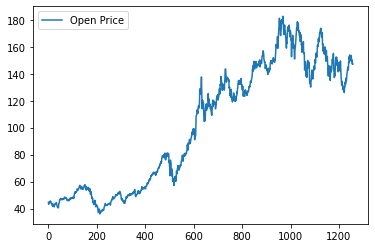

In [77]:
# Plot a line chart of the data without setting the `Date` column as the index
aapl_open_df = aapl_df[['Date', 'Open Price']].copy()
aapl_open_df.plot()

While setting the `Date` column as the DataFrame index, it's a good practice to convert date strings into datetime objects; this allows for the use of additional datetime functionality.

In [78]:
# Convert date strings into datetime objects and set the datetime as the index
aapl_open_df.set_index(pd.to_datetime(aapl_open_df['Date'], infer_datetime_format=True), inplace=True)
aapl_open_df.head()

,Date,Open Price
Date,,
2018-03-01,2018-03-01,44.634998
2018-03-02,2018-03-02,43.200001
2018-03-05,2018-03-05,43.802502
2018-03-06,2018-03-06,44.477501
2018-03-07,2018-03-07,43.735001


Be sure to drop the extra `Date` column after setting it as the index!

In [79]:
# Drop the extra date column
aapl_open_df.drop(columns=['Date'], inplace=True)
aapl_open_df.head()

,Open Price
Date,
2018-03-01,44.634998
2018-03-02,43.200001
2018-03-05,43.802502
2018-03-06,44.477501
2018-03-07,43.735001


Plotting data with datetimes as the index now allows us to see the dates as the x-axis label of the line chart.

<AxesSubplot:xlabel='Date'>

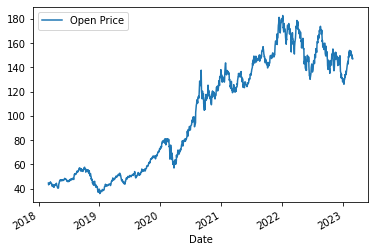

In [80]:
aapl_open_df.plot()

Use the `kind` parameter with the `plot()` function to specify different types of charts. The `plot()` function automatically defaults to generating a line chart.

<AxesSubplot:xlabel='Date'>

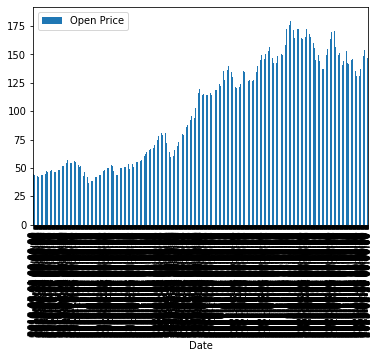

In [81]:
# Plot a bar chart of the data
aapl_open_df.plot(kind='bar')

Use the `figsize` parameter with the `plot()` funcion to increase or decrease the chart size. This is especially helpful when there are many x- or y-axis data points.

<AxesSubplot:xlabel='Date'>

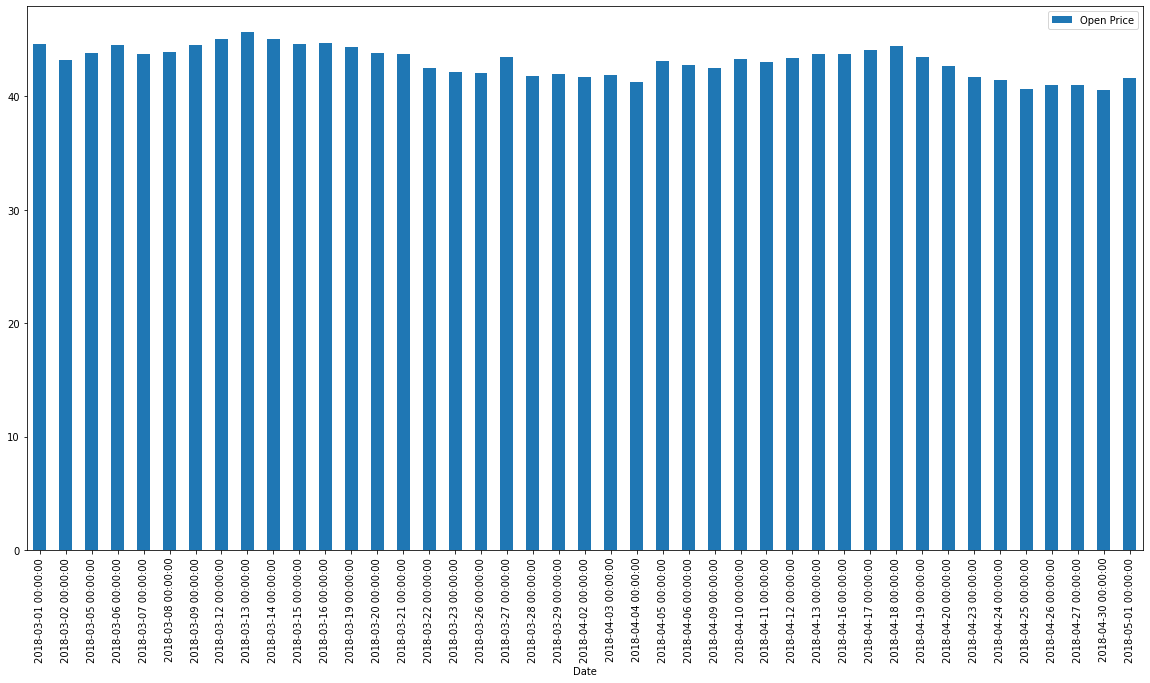

In [82]:
aapl_open_df.loc['2018/03/01':'2018/05/01'].plot(kind='bar', figsize=(20,10))

From Student Activity

<AxesSubplot:ylabel='contactTitle'>

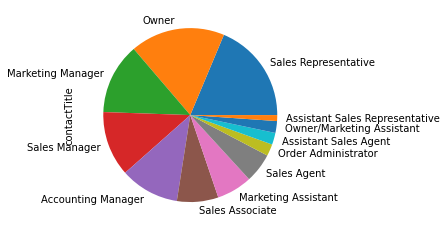

In [83]:
# Plot a pie chart from the distribution of contactTitlea
customers_df['contactTitle'].value_counts().plot(kind='pie')

`nlargest` function: return the first _n_ rows order by _columns_ in descending order.

DataFrame.nlargest(_n_, _columns_ , _keep='first'_ )

_keep_ : 可以为 first，last，all

In [84]:
df = pd.DataFrame({'population': [59000000, 65000000, 434000, 434000, 434000, 337000, 11300, 11300, 11300],
                   'GDP': [1937894, 2583560 , 12011, 4520, 12128, 17036, 182, 38, 311],
                   'alpha-2': ["IT", "FR", "MT", "MV", "BN", "IS", "NR", "TV", "AI"]},
                  index=["Italy", "France", "Malta", "Maldives", "Brunei", "Iceland", "Nauru", "Tuvalu", "Anguilla"])
df

,population,GDP,alpha-2
Italy,59000000,1937894,IT
France,65000000,2583560,FR
Malta,434000,12011,MT
Maldives,434000,4520,MV
Brunei,434000,12128,BN
Iceland,337000,17036,IS
Nauru,11300,182,NR
Tuvalu,11300,38,TV
Anguilla,11300,311,AI


In [86]:
print(df.nlargest(3, 'population'))
print(df.nlargest(3, 'population', keep='last'))
print(df.nlargest(3, 'population', keep='all'))
print(df.nlargest(3, ['population', 'GDP']))

        population      GDP alpha-2
France    65000000  2583560      FR
Italy     59000000  1937894      IT
Malta       434000    12011      MT
        population      GDP alpha-2
France    65000000  2583560      FR
Italy     59000000  1937894      IT
Brunei      434000    12128      BN
          population      GDP alpha-2
France      65000000  2583560      FR
Italy       59000000  1937894      IT
Malta         434000    12011      MT
Maldives      434000     4520      MV
Brunei        434000    12128      BN
        population      GDP alpha-2
France    65000000  2583560      FR
Italy     59000000  1937894      IT
Brunei      434000    12128      BN


Scatter Plot

A scatter plot is best suited for comparing the relationship between two variables, which in this case, is the relationship between price and earnings. The plot shows that there is a common range in which most companies tend to cluster in regards to price and earnings. However, as earnings increase, there seems to be a slight positive trend in price as well.

https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.DataFrame.plot.scatter.html
https://dataindependent.com/pandas/pandas-scatter-plot-dataframe-plot-scatter/

## Returns

The following demo introduces students to calculating daily returns with Pandas. It will also cover return on investment (ROI), the `pct_change` function, and cumulative returns. 

* A **return on investment (ROI)** is a percentage calculation that signifies either a profit or loss relative to the initial cost of an investment.

* ROI calculations can be used to standardize and compare the investment performances of varying asset classes such as equities, bonds, real estate, etc.

  ```python
  # ROI = (Current Value of Investment - Cost of Investment) / Cost of Investment
  initial_investment = 100
  current_price = 110

  roi = (current_price - initial_investment) / initial_investment
  roi_pct = roi * 100
  print(f"ROI for an initial investment of ${initial_investment}"
        f"now priced at ${current_price}"
        f"is {roi} or {roi_pct}%")
  ```

  ```
  ROI for an initial investment of $100 now priced at $110 is 0.1 or 10.0%
  ```

* **Daily returns** are a series of returns calculated over the course of several days, with each daily return representing the relative increase or decrease in investment between days.

In [90]:
aapl_df = pd.read_csv('../data/AAPL.csv')
aapl_df.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume
count,1258,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
unique,1258,NaN,NaN,NaN,NaN,NaN,NaN
top,2018-03-01,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,101.165763,102.406598,99.989223,101.250497,99.886915,1.141118e+08
std,NaN,45.847628,46.443235,45.255260,45.873843,46.180612,5.410241e+07
min,NaN,35.994999,36.430000,35.500000,35.547501,34.257282,3.519590e+07
25%,NaN,52.462500,52.973125,51.853751,52.328125,50.902652,7.786562e+07
50%,NaN,113.047500,115.115002,110.593750,112.773751,111.074520,9.912660e+07
75%,NaN,144.014999,146.404995,142.649994,144.552505,143.712307,1.336701e+08


In [91]:
# Drop unnecesary columns
aapl_df.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'], inplace=True)
aapl_df.head()

,Date,Adj Close
0,2018-03-01,41.707802
1,2018-03-02,41.996174
2,2018-03-05,42.141563
3,2018-03-06,42.105808
4,2018-03-07,41.714939


In [92]:
# Set the date as the index to the DataFrame
aapl_df.set_index(pd.to_datetime(aapl_df['Date'], infer_datetime_format=True), inplace=True)
aapl_df.head()

,Date,Adj Close
Date,,
2018-03-01,2018-03-01,41.707802
2018-03-02,2018-03-02,41.996174
2018-03-05,2018-03-05,42.141563
2018-03-06,2018-03-06,42.105808
2018-03-07,2018-03-07,41.714939


In [93]:
# Drop the extra date column
aapl_df.drop(columns=['Date'], inplace=True)
aapl_df.head()

,Adj Close
Date,
2018-03-01,41.707802
2018-03-02,41.996174
2018-03-05,42.141563
2018-03-06,42.105808
2018-03-07,41.714939


<AxesSubplot:xlabel='Date'>

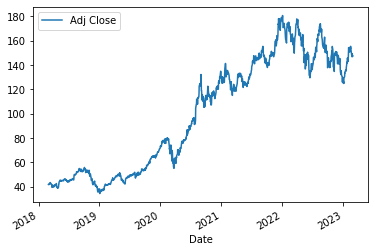

In [94]:
# Plot the daily closing stock price over the last 5 years
aapl_df.plot()

### Calculate Daily Returns (Method 1)

The `shift()` function creates an offset of a DataFrame index by a specified amount. In this case, the index of the dataframe is offset by one to emulate the daily return formula.

In [95]:
aapl_df.shift(1)

,Adj Close
Date,
2018-03-01,NaN
2018-03-02,41.707802
2018-03-05,41.996174
2018-03-06,42.141563
2018-03-07,42.105808
...,...
2023-02-22,148.479996
2023-02-23,148.910004
2023-02-24,149.399994


In [96]:
# Calculate the daily return using the 'shift()' function
daily_returns = (aapl_df - aapl_df.shift(1)) / aapl_df.shift(1)
daily_returns.head()

,Adj Close
Date,
2018-03-01,NaN
2018-03-02,0.006914
2018-03-05,0.003462
2018-03-06,-0.000848
2018-03-07,-0.009283


### Calculate Daily Returns (Method 2)

The `pct_change()` function calculates the percentage difference between each element of a time series. Therefore, for time series data such as daily closing prices of a stock, using the `pct_change()` function conveniently produces a series of daily return.

`pct_change()` is a very useful function in Pandas to calculate returns.

In [97]:
# Calculate the daily return using the 'pct_change()' function
daily_returns = aapl_df.pct_change()
daily_returns.head()

,Adj Close
Date,
2018-03-01,NaN
2018-03-02,0.006914
2018-03-05,0.003462
2018-03-06,-0.000848
2018-03-07,-0.009283


<AxesSubplot:xlabel='Date'>

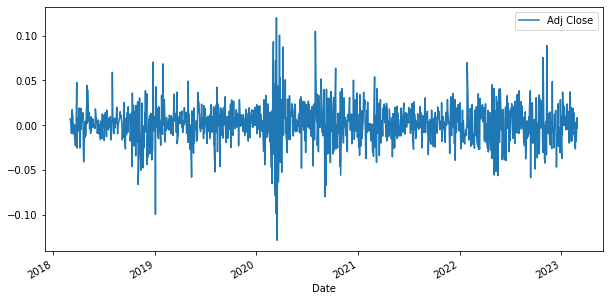

In [98]:
# Plot the daily returns of Apple stock over the last 5 years
daily_returns.plot(figsize=(10,5))

* **Cumulative returns** are a series of returns in which each return represents the relative increase or decrease in price of an asset at time `t`, compared to the initial price of that asset at time `t0`. Cumulative returns describe the progression of the return on investment of an asset over time.


* The `cumprod()` function multiplies each number in a series with the next successive number until the end of the series.


* In the equation `(1 + daily_returns).cumprod()`:

  * Each daily return is expressed as a capital multiplier (e.g., daily return of 0.5% is 1.005).

  * The `cumprod()` function cumulatively multiplies each number with its successive number.

  * Sometimes, the form `(1 + daily_returns).cumprod() - 1` is used; the `-1` brings the result from a capital multiplier expression back to a typical return value scale (e.g., daily return of 0.5% is 0.005).


In [99]:
cumulative_returns = (1 + daily_returns).cumprod() - 1
cumulative_returns.head()

,Adj Close
Date,
2018-03-01,NaN
2018-03-02,0.006914
2018-03-05,0.010400
2018-03-06,0.009543
2018-03-07,0.000171


<AxesSubplot:xlabel='Date'>

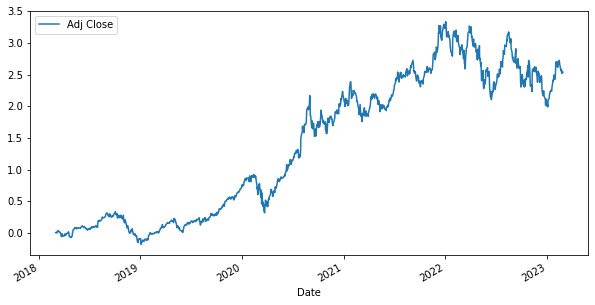

In [100]:
# Plot the cumulative return
cumulative_returns.plot(figsize=(10,5))

In [104]:
TSLA_df = pd.read_csv('../data/TSLA_Nasdaq.csv')
TSLA_df

,Date,Close/Last,Volume,Open,High,Low
0,03/03/2023,$197.79,154193300,$194.795,$200.48,$192.88
1,03/02/2023,$190.90,181979200,$186.74,$193.7499,$186.01
2,03/01/2023,$202.77,156852800,$206.21,$207.20,$198.52
3,02/28/2023,$205.71,153144900,$210.59,$211.23,$203.75
4,02/27/2023,$207.63,161028300,$202.03,$209.42,$201.26
...,...,...,...,...,...,...
1254,03/09/2018,$21.8113,82541644,$21.6067,$21.8993,$21.4913
1255,03/08/2018,$21.94,52715479,$22.1907,$22.22,$21.7516
1256,03/07/2018,$22.1533,75029062,$21.696,$22.1667,$21.4493
1257,03/06/2018,$21.88,63547213,$22.25,$22.4247,$21.802


In [105]:
TSLA_df.set_index(pd.to_datetime(TSLA_df['Date'], infer_datetime_format=True), inplace=True)
TSLA_df

,Date,Close/Last,Volume,Open,High,Low
Date,,,,,,
2023-03-03,03/03/2023,$197.79,154193300,$194.795,$200.48,$192.88
2023-03-02,03/02/2023,$190.90,181979200,$186.74,$193.7499,$186.01
2023-03-01,03/01/2023,$202.77,156852800,$206.21,$207.20,$198.52
2023-02-28,02/28/2023,$205.71,153144900,$210.59,$211.23,$203.75
2023-02-27,02/27/2023,$207.63,161028300,$202.03,$209.42,$201.26
...,...,...,...,...,...,...
2018-03-09,03/09/2018,$21.8113,82541644,$21.6067,$21.8993,$21.4913
2018-03-08,03/08/2018,$21.94,52715479,$22.1907,$22.22,$21.7516
2018-03-07,03/07/2018,$22.1533,75029062,$21.696,$22.1667,$21.4493


In [107]:
# Slice DataFrame into 1 year
TSLA_df.loc['2018-04-30':'2019-04-30']

,Date,Close/Last,Volume,Open,High,Low
Date,,,,,,
2019-04-30,04/30/2019,$15.9127,141704404,$16.1373,$16.2807,$15.80
2019-04-29,04/29/2019,$16.098,250299175,$15.724,$16.2653,$15.478
2019-04-26,04/26/2019,$15.676,332267234,$16.4333,$16.4453,$15.4087
2019-04-25,04/25/2019,$16.5087,327350536,$17.00,$17.2667,$16.4047
2019-04-24,04/24/2019,$17.244,144855843,$17.59,$17.688,$17.20
...,...,...,...,...,...,...
2018-05-07,05/07/2018,$20.1847,130096285,$19.8333,$20.3973,$19.678
2018-05-04,05/04/2018,$19.606,128482526,$18.8667,$19.7907,$18.6347
2018-05-03,05/03/2018,$18.9633,260086220,$18.586,$19.2027,$18.3487


In [108]:
TSLA_df_1_year = TSLA_df.loc['2019-04-30':'2018-04-30']
TSLA_df_1_year

,Date,Close/Last,Volume,Open,High,Low
Date,,,,,,


dataframe attribute
aggregation function: sum(), mean()